In [1]:
import cv2
from skimage.exposure import match_histograms
import numpy as np 
import matplotlib.pyplot as plt
from math import log10, sqrt

---
### Question 1
---

## Q 1-A

In [2]:
img1 = cv2.imread("Image1.jpeg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1.shape

(800, 1000, 3)

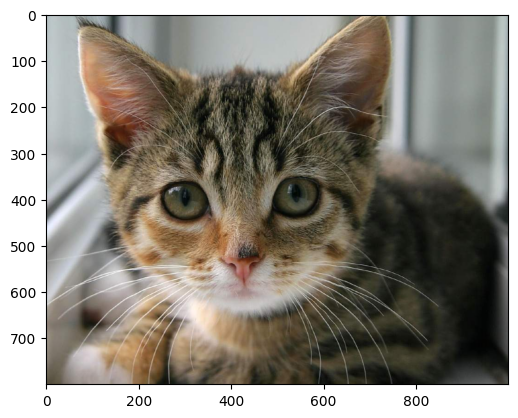

In [3]:
plt.imshow(img1)

## Q 1-B
#### Showing input channels 

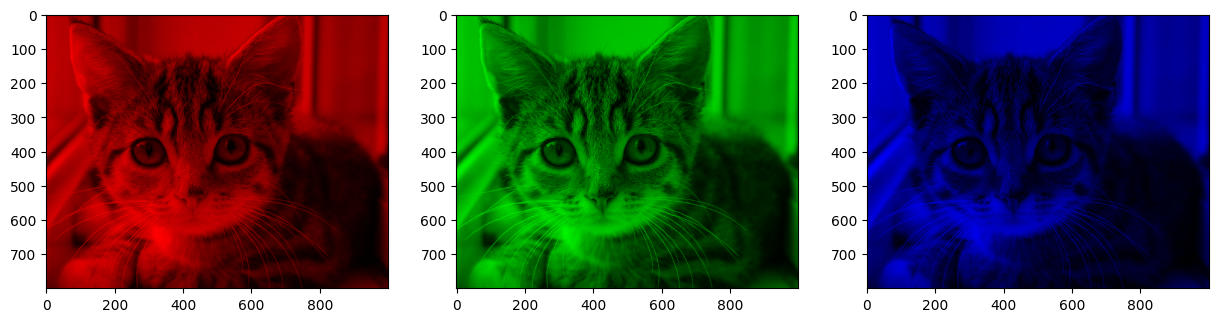

In [4]:
zero_chnl = np.zeros((img1.shape[0], img1.shape[1]))

red = np.stack([img1[:,:,0], zero_chnl, zero_chnl], axis=2)
green = np.stack([zero_chnl, img1[:,:,1], zero_chnl], axis=2)
blue = np.stack([zero_chnl, zero_chnl, img1[:,:,2]], axis=2)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(red/255)
ax[1].imshow(green/255)
ax[2].imshow(blue/255)

## Q 1-C
#### Converting to gray scale :
Using this lumninace extraction weights : [0.2989, 0.5870, 0.1140] 

And also using normal averaging

Text(0.5, 1.0, 'Gray scale using simple averaging')

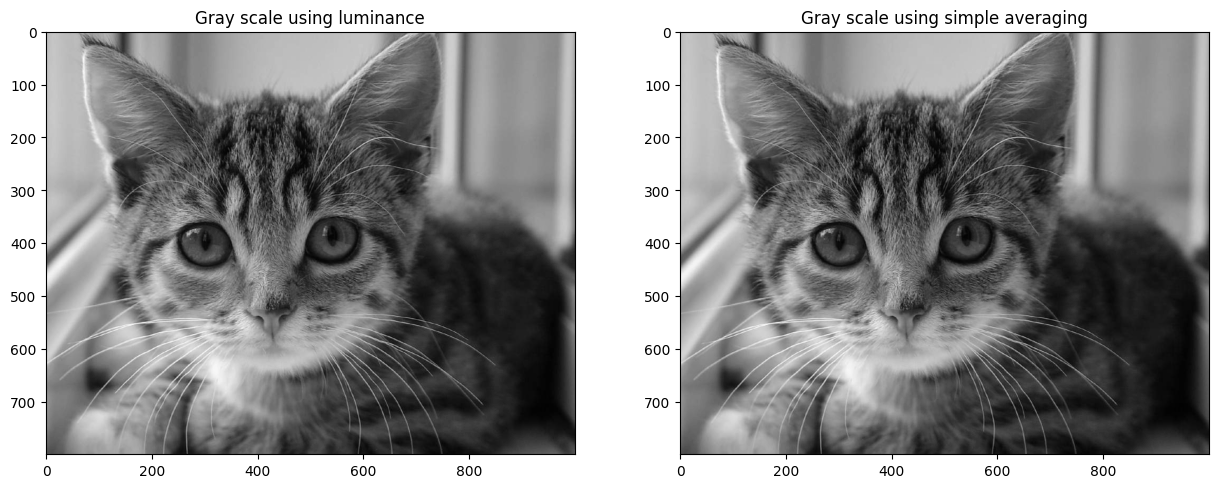

In [5]:
luma_matrix = np.array([0.2989, 0.5870, 0.1140])
gray_scale = img1.dot(luma_matrix)
gray_scale_n = img1.dot(np.array([1,1,1]))
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].imshow(gray_scale, cmap="gray")
ax[0].set_title("Gray scale using luminance")
ax[1].imshow(gray_scale_n, cmap="gray")
ax[1].set_title("Gray scale using simple averaging")

#### Binarize the image:

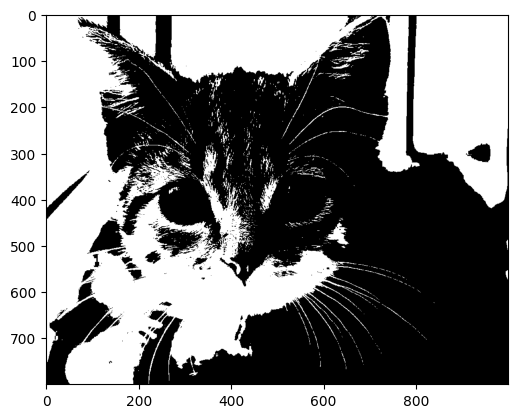

In [6]:
thershhold = 127
binary_img = (gray_scale > thershhold)*1
plt.imshow(binary_img, cmap="gray")

## Q 1-D
#### Converting to HSV
This is the way I converted the image
- V = Max(R,G,B)
- S = (Max(R,G,B) - Min(R,G,B))/Max(R,G,B)
- H = 

In [7]:
def RGB_to_HSV(img):
    tmp = img/255
    indeces = tmp.argmax(axis=2)
    maximum = tmp.max(axis=2)
    minimum = tmp.min(axis=2)

    diff = maximum - minimum 
    mask = diff != 0
    # negs = diff < 0

    is_red_max = indeces == 0
    is_green_max = indeces == 1
    is_blue_max = indeces == 2
    hue = np.zeros((tmp.shape[0], tmp.shape[1]))

    mask_r = np.logical_and(mask, is_red_max)
    mask_g = np.logical_and(mask, is_green_max)
    mask_b = np.logical_and(mask, is_blue_max)

    hue[mask_r] = ((tmp[mask_r, 1] - tmp[mask_r, 2])/diff[mask_r])%6
    hue[mask_g] = (2 + (tmp[mask_g, 2] - tmp[mask_g, 0])/diff[mask_g])
    hue[mask_b] = (4 + (tmp[mask_b, 0] - tmp[mask_b, 1])/diff[mask_b])

    hue = (hue*60 )%360
    # hue[negs] += 360
    hue = hue/(360)
    value = maximum
    saturation = (diff)/maximum
    saturation[maximum == 0] = 0

    hsv_img_s = np.stack([hue*179, saturation*255, value*255], axis=2).astype(np.uint8)
    return hsv_img_s

## Q 1-E
#### Comparision :
As its shown implemented from scratch is a bit different from the one opencv calculated .

C:\Users\hosse\AppData\Local\Temp\ipykernel_4864\2355686340.py:28: RuntimeWarning: invalid value encountered in divide
  saturation = (diff)/maximum


Text(0.5, 1.0, 'HSV conversion using opencv')

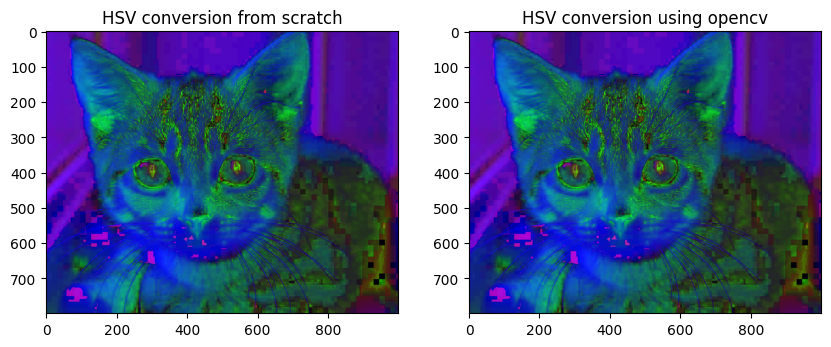

In [8]:
rgb2hsv_s = RGB_to_HSV(img1)
rgb2hsv_cv2 = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
# print(rgb2hsv_cv2.dtype)
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(rgb2hsv_s)
ax[0].set_title("HSV conversion from scratch")
ax[1].imshow(rgb2hsv_cv2)
ax[1].set_title("HSV conversion using opencv")

Scale of differences in hue values are not big of deal so there are not different in their hues 

In [9]:
rgb2hsv_s[:,:,0], rgb2hsv_cv2[:,:,0]

(array([[94, 94, 94, ..., 89, 89, 89],
        [94, 94, 94, ..., 89, 89, 89],
        [94, 94, 94, ..., 89, 89, 89],
        ...,
        [20, 20, 20, ..., 35, 35, 35],
        [20, 20, 20, ..., 35, 35, 35],
        [20, 20, 20, ..., 35, 35, 35]], dtype=uint8),
 array([[95, 95, 95, ..., 90, 90, 90],
        [95, 95, 95, ..., 90, 90, 90],
        [95, 95, 95, ..., 90, 90, 90],
        ...,
        [21, 21, 21, ..., 35, 35, 35],
        [21, 21, 21, ..., 35, 35, 35],
        [21, 21, 21, ..., 35, 35, 35]], dtype=uint8))

Also their scale in saturation are not different that much only a fraction 

In [10]:
rgb2hsv_s[:,:,1] , rgb2hsv_cv2[:,:,1]

(array([[17, 17, 17, ..., 16, 17, 17],
        [17, 17, 17, ..., 16, 17, 17],
        [17, 17, 17, ..., 16, 17, 17],
        ...,
        [61, 62, 63, ..., 34, 32, 31],
        [61, 62, 63, ..., 34, 32, 31],
        [61, 61, 63, ..., 34, 32, 31]], dtype=uint8),
 array([[18, 17, 17, ..., 17, 17, 17],
        [17, 17, 17, ..., 17, 17, 17],
        [17, 17, 17, ..., 17, 17, 17],
        ...,
        [62, 62, 64, ..., 35, 33, 32],
        [61, 62, 63, ..., 35, 33, 32],
        [61, 62, 63, ..., 35, 33, 32]], dtype=uint8))

And even in the value channel there is no difference that can be seen so by this double checking there is gotta be no problem.

In [11]:
rgb2hsv_s[:,:,2] - rgb2hsv_cv2[:,:,2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

So as a conclusion there should be no problem in using it because the difference is not significant 

## Q 1-F
#### Color extraction :
Based on what i searched easiest and only way found to do so is to clamp specified range of color from hue part of an image and create mask matrix that has 1 in every value that is in that specific range and 0 otherwise So thats what i did based on this link (https://cvexplained.wordpress.com/2020/04/28/color-detection-hsv/#:~:text=From%20the%20above%20HSV%20color,range%20(20%2C%20255).&text=Our%20rose%20flower%20is%20predominantly,HSV%20values%20of%20red%20color.), But logicaly its possible to convert the image to other color models and then extract the red components but infact some of this red components for example in RGB are not percivable because for example in RGB color model if we assume red channel as red information of the image its not right cause red and other two colors can be combined and create other colors hence its not true to use the red channel as the red component(information) of an image .

So for conlcusion I'd say one of the best way to extract color specific information from an image is by using HSV color model or any color model that has a single channel to define color .

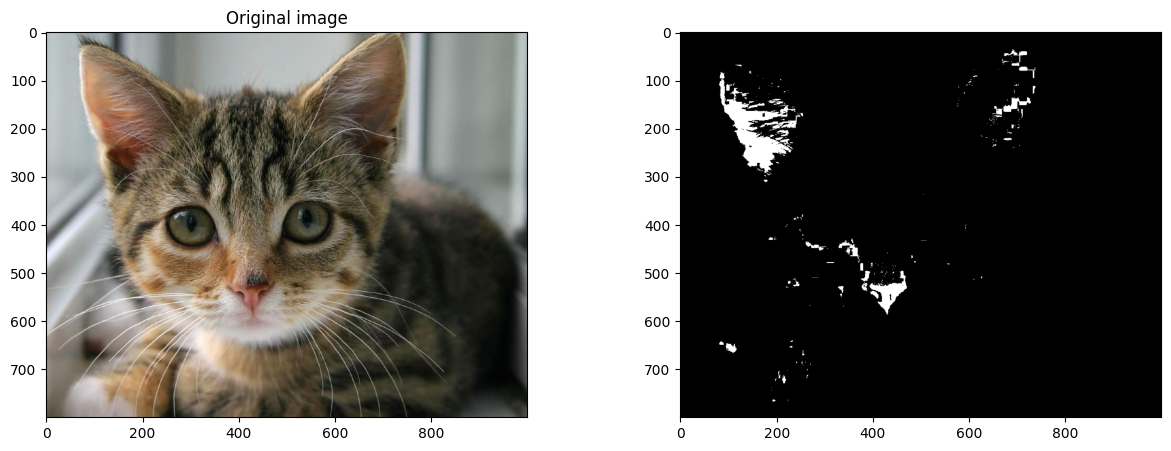

In [12]:
lower1 = np.array([0, 100, 20])
upper1 = np.array([12, 255, 255])

lower2 = np.array([160,100,20])
upper2 = np.array([179,255,255])
 
lower_mask = cv2.inRange(rgb2hsv_s, lower1, upper1)
upper_mask = cv2.inRange(rgb2hsv_s, lower2, upper2)
 
full_mask = lower_mask + upper_mask


fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(img1)
ax[0].set_title("Original image")
ax[1].imshow(full_mask, cmap="gray")

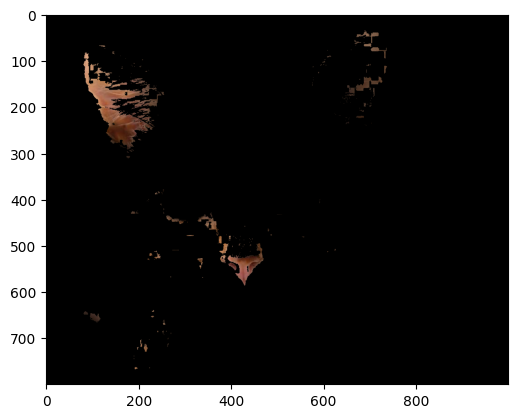

In [17]:
reds = cv2.bitwise_and(img1, img1, mask=full_mask)
plt.imshow(reds)

---
### Question 2
---

## Q 2

Text(0.5, 1.0, 'Target image')

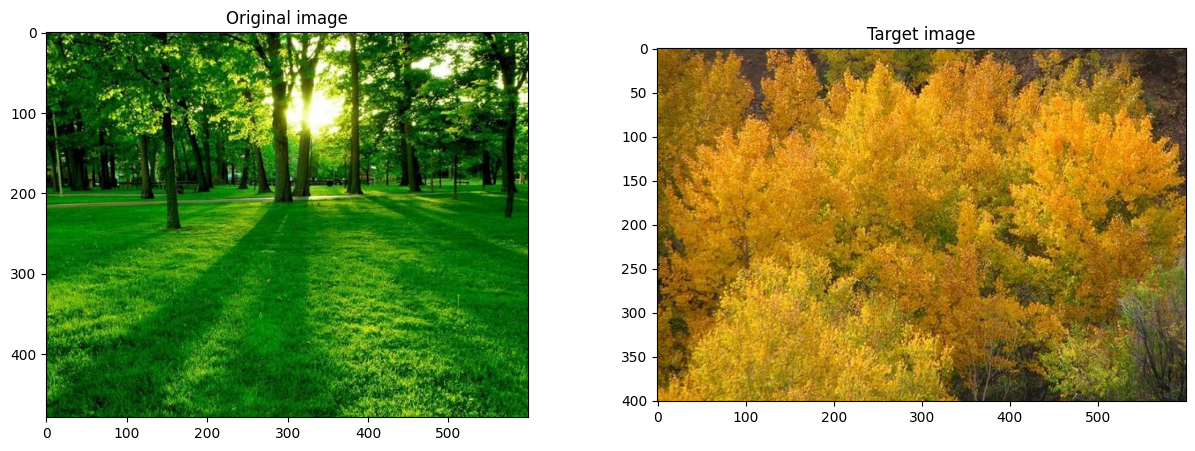

In [2]:
or_img = cv2.imread("Image2.1.jpg")
or_img = cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB)
tr_img = cv2.imread("Image2.2.jpg")
tr_img = cv2.cvtColor(tr_img, cv2.COLOR_BGR2RGB)


fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(or_img)
ax[0].set_title("Original image")
ax[1].imshow(tr_img)
ax[1].set_title("Target image")

In [20]:
matched = match_histograms(or_img, tr_img, channel_axis=-1)

As we can see it distroid the whole color balance in the image as I applied the histogram matching on all channels using channel_axis=-1 so its not recommended

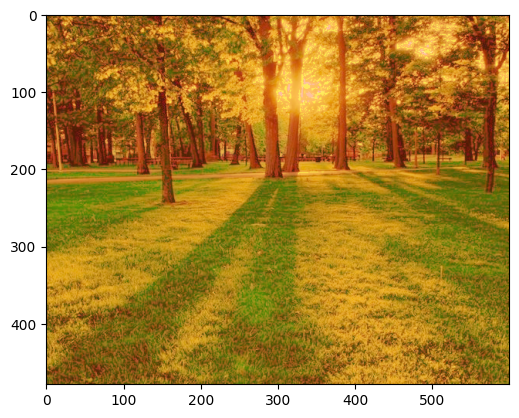

In [21]:
plt.imshow(matched)

---
### Question 3
---

## Q 3-A

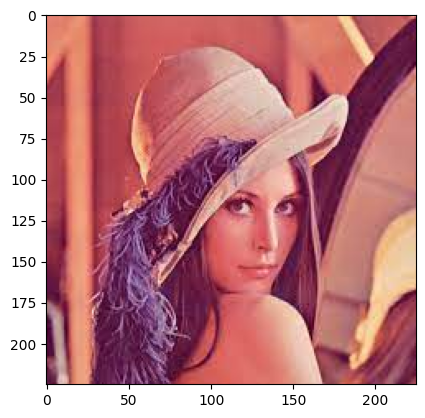

In [42]:
img3 = cv2.imread("Image3.jpg")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)

1. Apply two 3*3 average filter 

In [43]:
kernel_size = 3
kernel = np.ones((kernel_size, kernel_size), dtype=float)/kernel_size**2
filtered_1 = cv2.filter2D(img3, -1, kernel=kernel)
filtered_1 = cv2.filter2D(filtered_1, -1, kernel=kernel)

2. Apply one 9*9 average filter

In [44]:
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size), dtype=float)/kernel_size**2
filtered_2 = cv2.filter2D(img3, -1, kernel=kernel)

3. Apply one 5*5 gaussian filter


In [45]:
kernel_size = 5
kernel = cv2.getGaussianKernel(kernel_size, 1)
filtered_3 = cv2.filter2D(img3, -1, kernel=kernel)

As we can see in below images it is obvious that none of these filters are equal to each other


Text(0.5, 1.0, '5*5 gausssian filters applied')

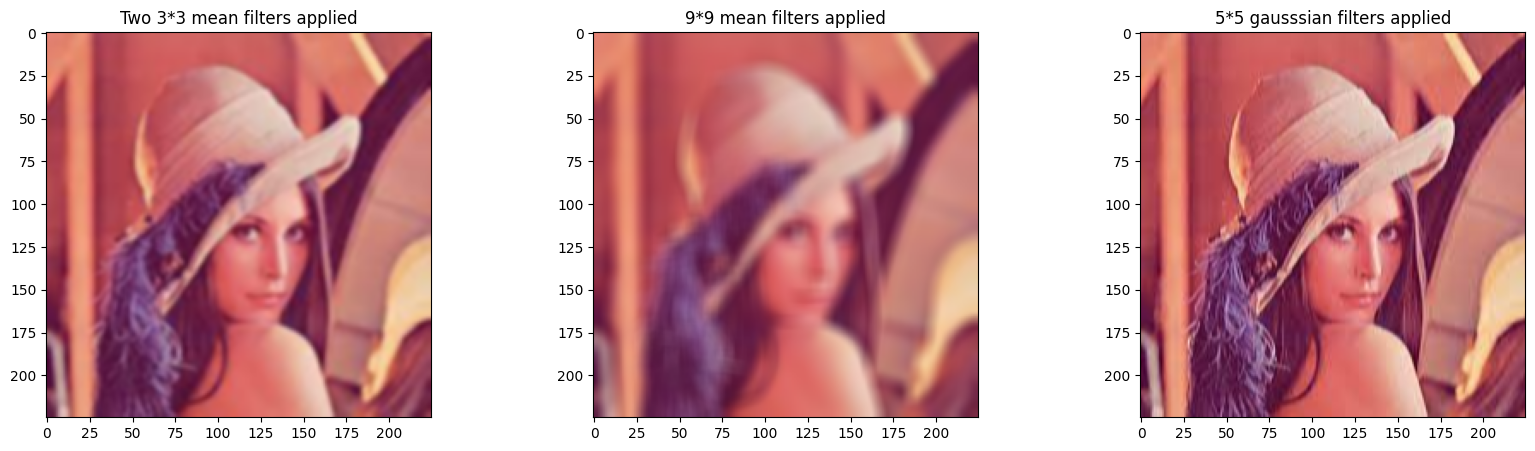

In [46]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].imshow(filtered_1)
ax[0].set_title("Two 3*3 mean filters applied")
ax[1].imshow(filtered_2)
ax[1].set_title("9*9 mean filters applied")
ax[2].imshow(filtered_3)
ax[2].set_title("5*5 gausssian filters applied")

Text(0.5, 1.0, 'Blue channel of 5*5 gausssian filters applied')

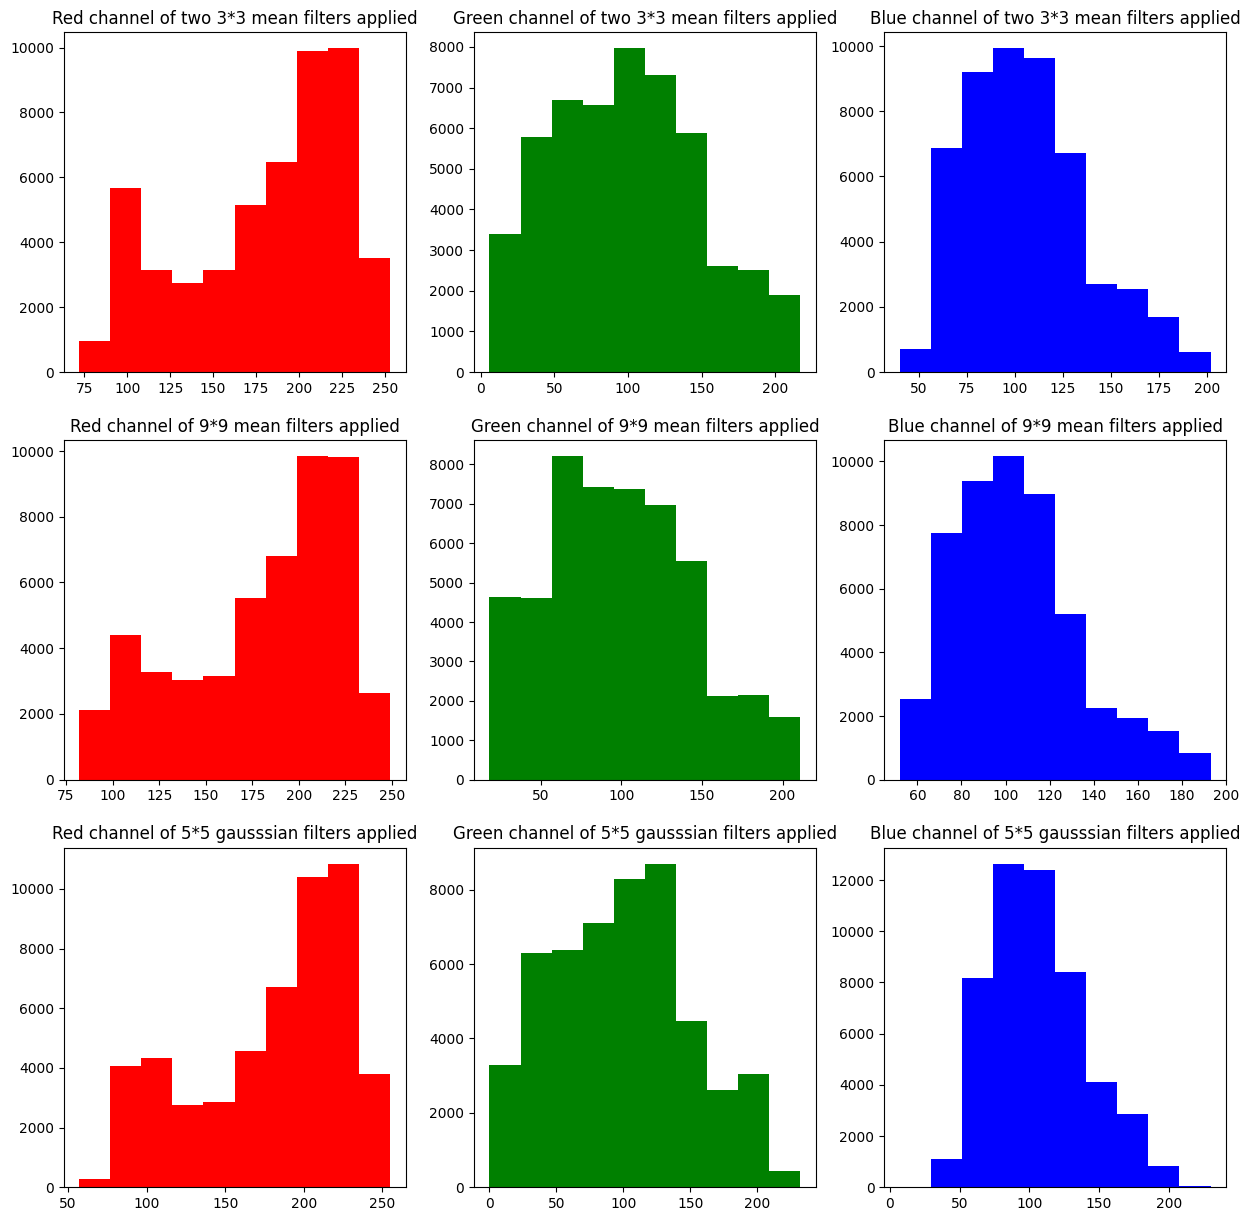

In [47]:
fig, ax = plt.subplots(3,3, figsize=(15,15))
ax[0,0].hist(filtered_1[:,:,0].ravel(),color="r")
ax[0,0].set_title("Red channel of two 3*3 mean filters applied")
ax[0,1].hist(filtered_1[:,:,1].ravel(),color="g")
ax[0,1].set_title("Green channel of two 3*3 mean filters applied")
ax[0,2].hist(filtered_1[:,:,2].ravel(),color="b")
ax[0,2].set_title("Blue channel of two 3*3 mean filters applied")
ax[1,0].hist(filtered_2[:,:,0].ravel(),color="r")
ax[1,0].set_title("Red channel of 9*9 mean filters applied")
ax[1,1].hist(filtered_2[:,:,1].ravel(),color="g")
ax[1,1].set_title("Green channel of 9*9 mean filters applied")
ax[1,2].hist(filtered_2[:,:,2].ravel(),color="b")
ax[1,2].set_title("Blue channel of 9*9 mean filters applied")
ax[2,0].hist(filtered_3[:,:,0].ravel(),color="r")
ax[2,0].set_title("Red channel of 5*5 gausssian filters applied")
ax[2,1].hist(filtered_3[:,:,1].ravel(),color="g")
ax[2,1].set_title("Green channel of 5*5 gausssian filters applied")
ax[2,2].hist(filtered_3[:,:,2].ravel(),color="b")
ax[2,2].set_title("Blue channel of 5*5 gausssian filters applied")

Based on above plots is highly observable that these three transformation did not highly effected the red channels but we can not say this for remaining two channels 


Text(0.5, 1.0, 'Blue channel of 9*9 mean filters applied')

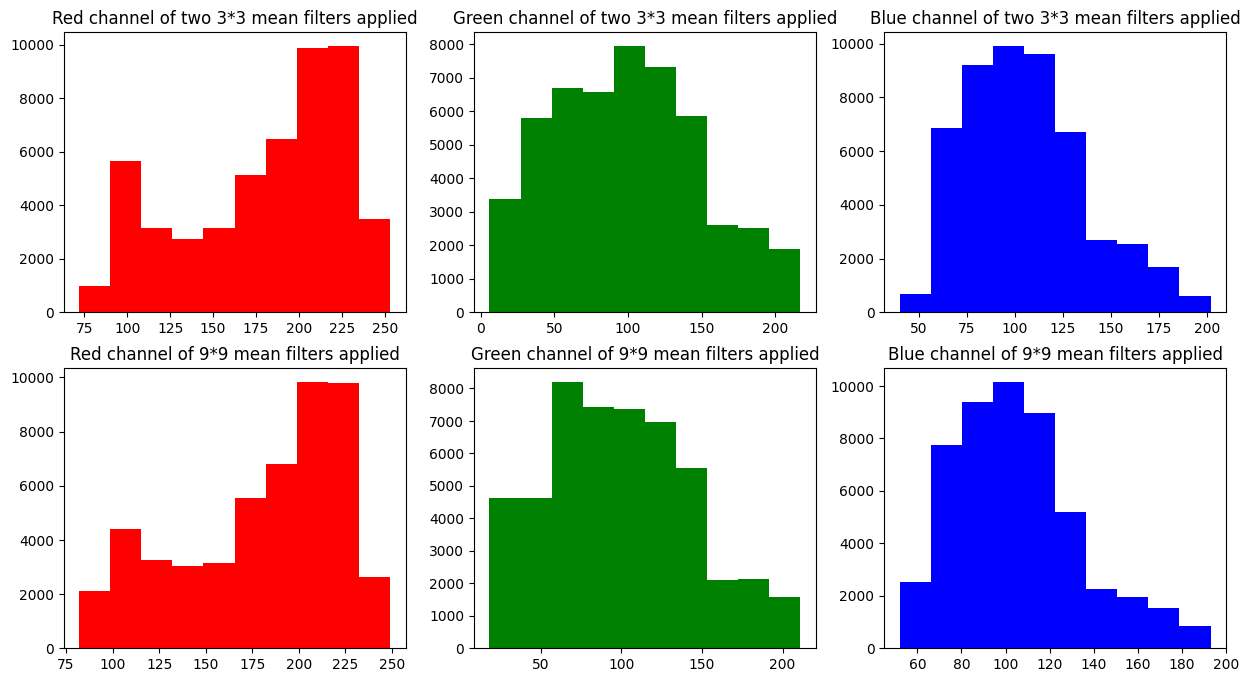

In [48]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax[0,0].hist(filtered_1[:,:,0].ravel(),color="r")
ax[0,0].set_title("Red channel of two 3*3 mean filters applied")
ax[0,1].hist(filtered_1[:,:,1].ravel(),color="g")
ax[0,1].set_title("Green channel of two 3*3 mean filters applied")
ax[0,2].hist(filtered_1[:,:,2].ravel(),color="b")
ax[0,2].set_title("Blue channel of two 3*3 mean filters applied")
ax[1,0].hist(filtered_2[:,:,0].ravel(),color="r")
ax[1,0].set_title("Red channel of 9*9 mean filters applied")
ax[1,1].hist(filtered_2[:,:,1].ravel(),color="g")
ax[1,1].set_title("Green channel of 9*9 mean filters applied")
ax[1,2].hist(filtered_2[:,:,2].ravel(),color="b")
ax[1,2].set_title("Blue channel of 9*9 mean filters applied")

##### Comparision of two 3 by 3 mean filter and one 9 by 9 mean filter 
Its like histograms of 9 by 9 mean filter is more likely to be uniform (closer to uniform distribution ) compared to two 3 by 3 mean filter, histogram of 9 by 9 mean filter is smoother than histogram of two 3 by 3 mean filters which is logicaly true because two 3 by 3 mean filters effect on an images leads to remaining more temporal color information rather than one 9 by 9 mean filter.

Text(0.5, 1.0, 'Blue channel of 5*5 gausssian filters applied')

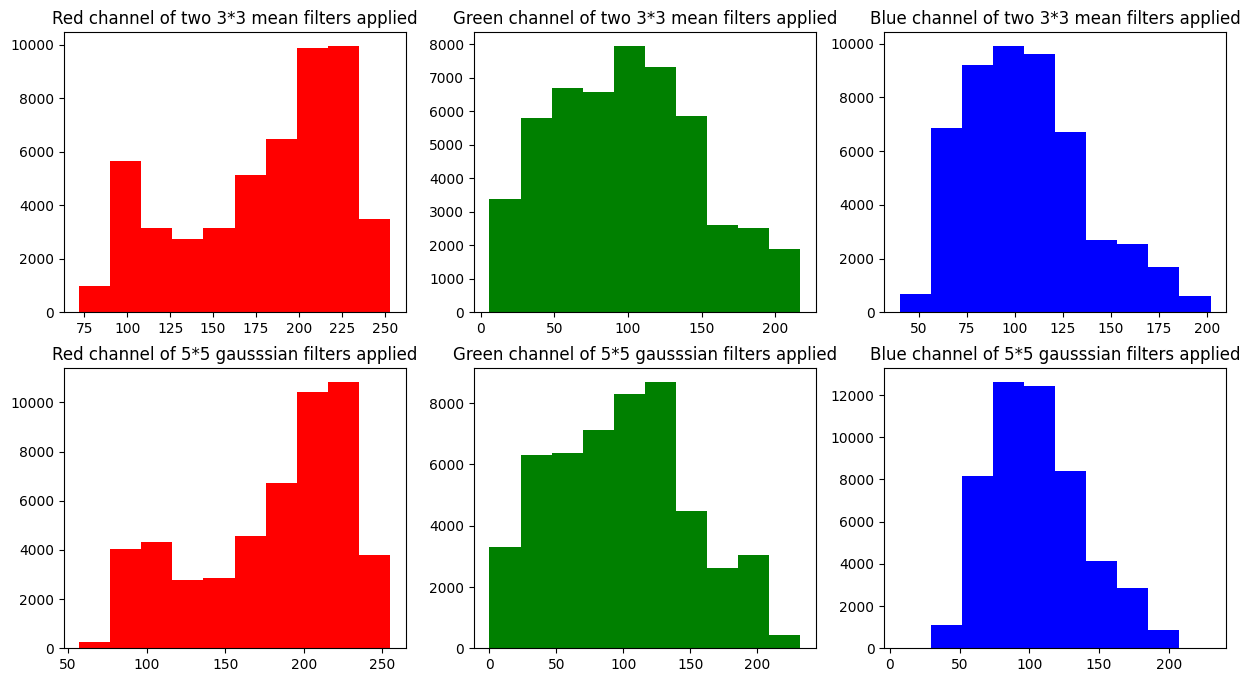

In [49]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax[0,0].hist(filtered_1[:,:,0].ravel(),color="r")
ax[0,0].set_title("Red channel of two 3*3 mean filters applied")
ax[0,1].hist(filtered_1[:,:,1].ravel(),color="g")
ax[0,1].set_title("Green channel of two 3*3 mean filters applied")
ax[0,2].hist(filtered_1[:,:,2].ravel(),color="b")
ax[0,2].set_title("Blue channel of two 3*3 mean filters applied")
ax[1,0].hist(filtered_3[:,:,0].ravel(),color="r")
ax[1,0].set_title("Red channel of 5*5 gausssian filters applied")
ax[1,1].hist(filtered_3[:,:,1].ravel(),color="g")
ax[1,1].set_title("Green channel of 5*5 gausssian filters applied")
ax[1,2].hist(filtered_3[:,:,2].ravel(),color="b")
ax[1,2].set_title("Blue channel of 5*5 gausssian filters applied")

##### Comparision of two 3 by 3 mean filters with 5 by 5 gaussian blure :
These plots show two 3 by 3 mean filter added some color information to the original image because in blue channels histogram there exist some colors that are not actually exist in 5 by5 gaussian blure filter so it seems like 3 by 3 filters stretched the histogram a bit so these informations got added also lower level of blue shades has been added after two 3 by 3 mean filters. As a conclusion these two histograms are not look a like


Text(0.5, 1.0, 'Blue channel of 5*5 gausssian filters applied')

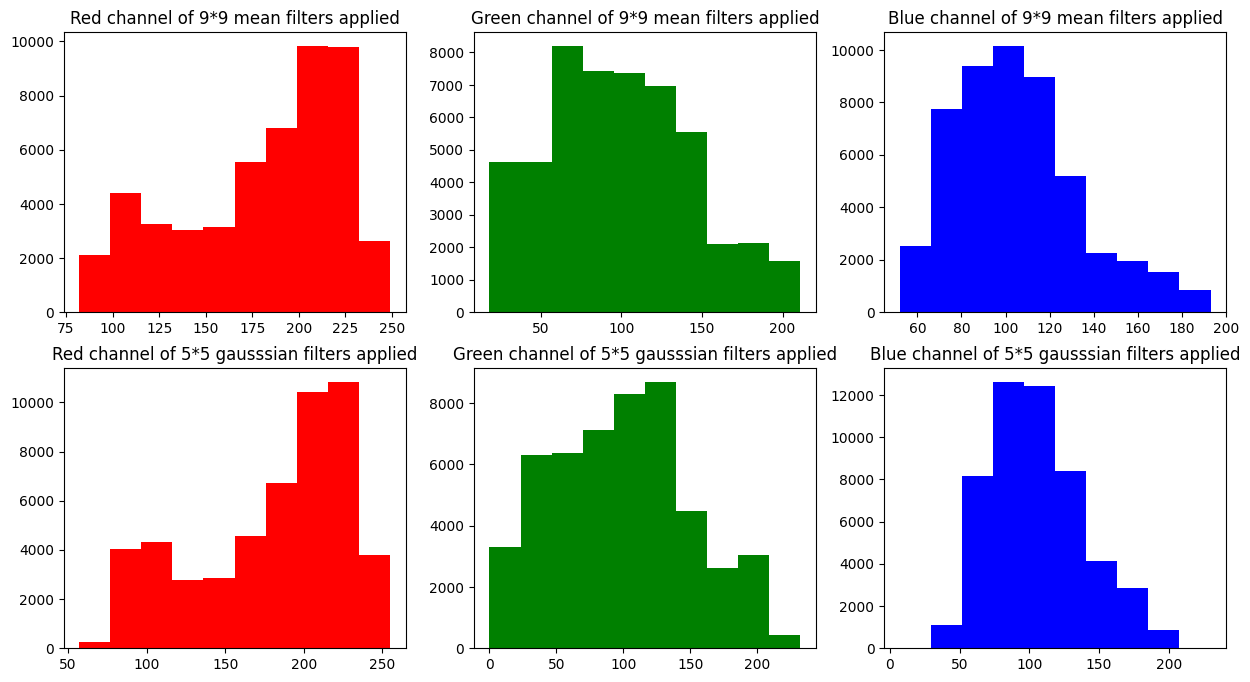

In [50]:
fig, ax = plt.subplots(2,3, figsize=(15,8))
ax[0,0].hist(filtered_2[:,:,0].ravel(),color="r")
ax[0,0].set_title("Red channel of 9*9 mean filters applied")
ax[0,1].hist(filtered_2[:,:,1].ravel(),color="g")
ax[0,1].set_title("Green channel of 9*9 mean filters applied")
ax[0,2].hist(filtered_2[:,:,2].ravel(),color="b")
ax[0,2].set_title("Blue channel of 9*9 mean filters applied")
ax[1,0].hist(filtered_3[:,:,0].ravel(),color="r")
ax[1,0].set_title("Red channel of 5*5 gausssian filters applied")
ax[1,1].hist(filtered_3[:,:,1].ravel(),color="g")
ax[1,1].set_title("Green channel of 5*5 gausssian filters applied")
ax[1,2].hist(filtered_3[:,:,2].ravel(),color="b")
ax[1,2].set_title("Blue channel of 5*5 gausssian filters applied")

#### Comparision of 9 by 9 mean filter and 5 by 5 gaussian blure filter 
First thing to notice is that these two histograms in blue channel is like one of them is stretched version of the other one. There exist adding extra informations to the histograms in 9 by 9 mean filter just like two 3 by 3 mean filters .Also not to forget 9 by 9 mean filter transformation led to a distribution closer to uniform .

## Q 3-B

In [52]:
def calculate_psnr(original_image, compressed_image):
    mse = np.mean((original_image - compressed_image) ** 2) 
    if mse == 0: 
        return float('inf')
    max_pixel = 255.0  
    psnr = 20 * log10(max_pixel / sqrt(mse))  
    return psnr

In [54]:
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=float)/kernel_size**2
filtered_tmp = cv2.filter2D(img3, -1, kernel=kernel)
abs(filtered_1 - filtered_tmp).mean()

81.10110288065843

Its seems like the best similar filter to two 3 by 3 mean filter is one 5 by 5 mean filter even the PSNR criterion shows smaller portion of distortion in the image compared to other filters

In [55]:
calculate_psnr(filtered_1, filtered_tmp)

38.333058886243585

Text(0.5, 1.0, '5*5 mean filters applied')

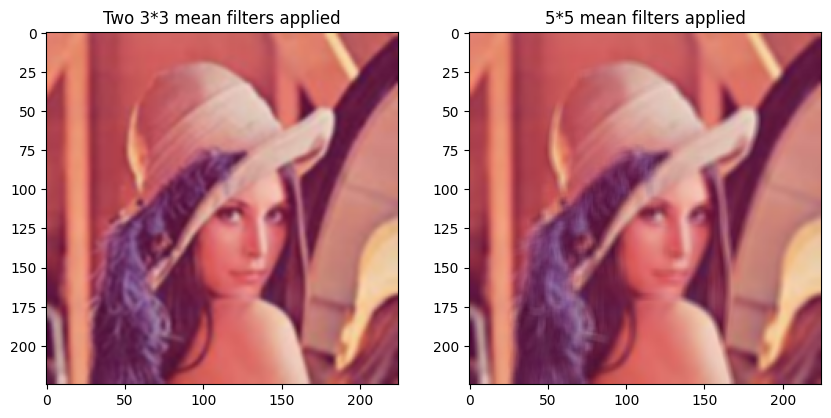

In [26]:

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(filtered_1)
ax[0].set_title("Two 3*3 mean filters applied")
ax[1].imshow(filtered_tmp)
ax[1].set_title("5*5 mean filters applied")

## Q 3-C

In [51]:
calculate_psnr(filtered_1, filtered_2), calculate_psnr(filtered_1, filtered_3)

(31.885442738837646, 33.91893652361783)

It looks like that the outcome of these two comparison shows even by evaluating amount of distortion of the outcomes gaussian blure did better compared to 9 by 9 mean filter because 5 by 5 gaussian blure has 33.9 db psnr that indicate it has better quality than 9 by 9 mean filter with 31.88 db which has lower quality compared to gaussian blure . As a conclusion 9 by 9 filter distroid the image way more and lost much more information of it .

---
### Question 4
---
## Q 4

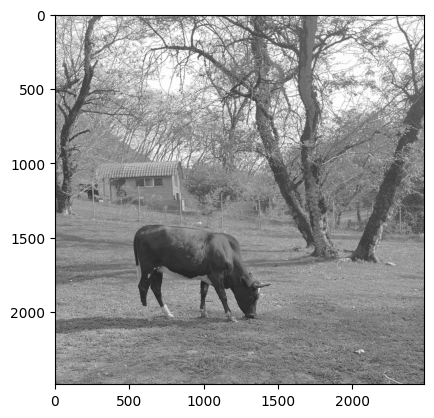

In [5]:
img4 = cv2.imread("Image4.jpeg")
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
plt.imshow(img4, cmap="gray")

Text(0.5, 1.0, 'Equalized using cv2')

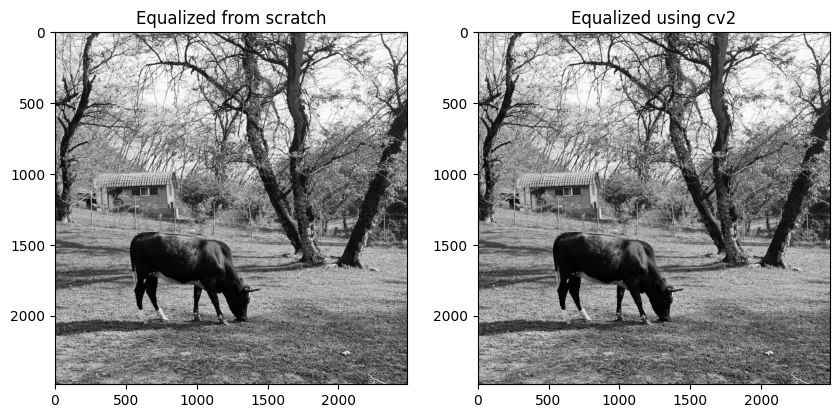

In [6]:
def equalize(img, L=256):
    flattened = img.ravel()
    unique, bit_idx, counts = np.unique(flattened, return_counts=True, return_inverse=True)
    probs = counts/counts.sum()
    cdf = probs.cumsum()
    cdf = cdf
    eq = cdf*(L-1)
    eq = np.round(eq)
    return (eq[bit_idx]).reshape(img.shape)

equalized_img4_s = equalize(img4)
equalized_img4_cv2 = cv2.equalizeHist(img4)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(equalized_img4_s, cmap="gray")
ax[0].set_title("Equalized from scratch")
ax[1].imshow(equalized_img4_cv2, cmap="gray")
ax[1].set_title("Equalized using cv2")

Equalized versions are just look a like , in the image and in their histograms aswell 

Text(0.5, 1.0, 'Equalized using cv2')

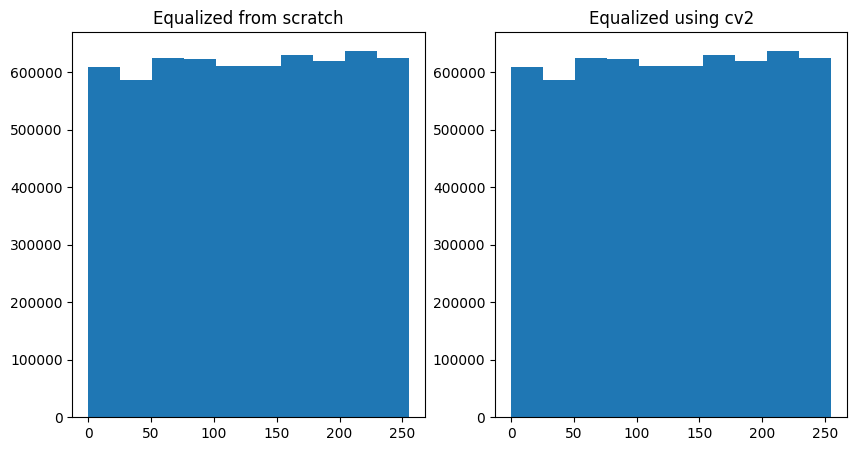

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(equalized_img4_s.ravel())
ax[0].set_title("Equalized from scratch")
ax[1].hist(equalized_img4_cv2.ravel())
ax[1].set_title("Equalized using cv2")

But if we check whether they are exactly look a like we see that these two implementation led to different results that are not perceivable.Based on my implementation I dont think there has been any mistaks but there might be some differences in rounding procedure that led to this issue because MAE shows a small value so there should not be any problem with the algorithm so we can ignore this difference. 

In [8]:
abs(equalized_img4_s - equalized_img4_cv2).mean()

0.007486528830933286

In [9]:
calculate_psnr(equalized_img4_s, equalized_img4_cv2)

69.38799859456809

---
### Question 5
---
## Q 5

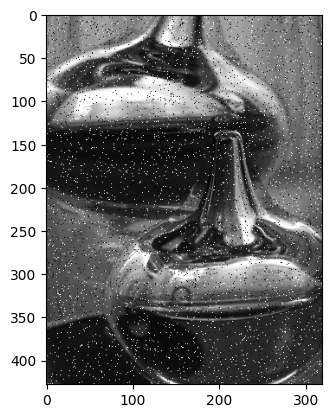

In [55]:
img5 = cv2.imread("Image5.png")
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
plt.imshow(img5,cmap="gray")

As it is being shown in the image noise of the image is sult and peper so best way to denoise this is by using median filter.

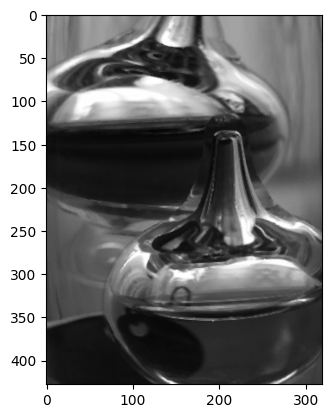

In [61]:
dn_img5 = cv2.medianBlur(img5, 3)
plt.imshow(dn_img5, cmap="gray")

---
### Question 6
---
## Q 6

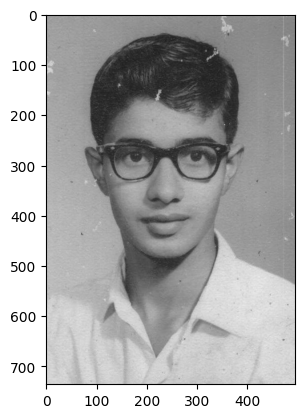

In [154]:
img6 = cv2.imread("rndm.jpg")
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
plt.imshow(img6, cmap="gray")

Text(0.5, 1.0, 'USM image')

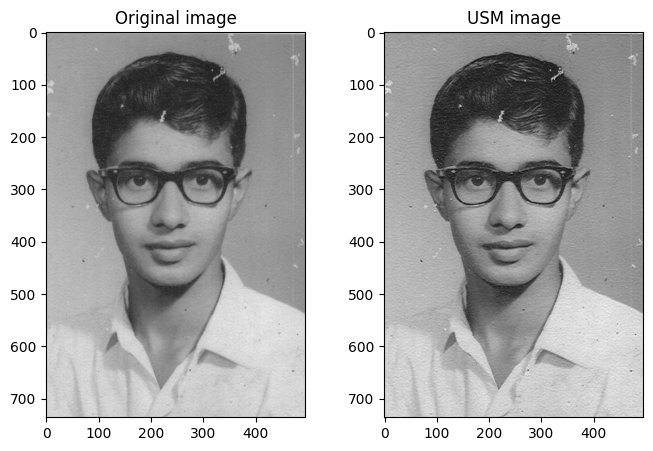

In [155]:
alpha = 1
kernel_size = 8
kernel = cv2.getGaussianKernel(kernel_size, 3)
# kernel = np.ones((kernel_size, kernel_size), dtype=float)/kernel_size**2
blured = cv2.filter2D(img6, -1, kernel=kernel)
masked = img6 - blured
usm = img6 + alpha*masked


fig, ax = plt.subplots(1,2, figsize=(8,5))
ax[0].imshow(img6, cmap="gray")
ax[0].set_title("Original image")
ax[1].imshow(usm, cmap="gray")
ax[1].set_title("USM image")

In [156]:
cv2.imwrite("usm_rndm.jpg", usm)

True

---
### Question 7
---
## Q 7

In [89]:
with open("input1.txt", 'r') as file:
    first_line = file.readline().strip().split()
    width = int(first_line[1])
    height = int(first_line[0])
    label = int(first_line[2])
    pixels = []
    for _ in range(height):
        line = file.readline().strip().split()
        row = [np.array([int(line[i].replace('(', '').replace(')', '').replace(',', '')), int(line[i+1].replace('(', '').replace(')', '').replace(',', '')), int(line[i+2].replace('(', '').replace(')', '').replace(',', ''))]) for i in range(0, len(line), 3)]
        pixels.append(row)

In [2]:
with open("input5.txt", 'r') as file:
    first_line = file.readline().strip().split()
    width = int(first_line[1])
    height = int(first_line[0])
    label = int(first_line[2])
    pixels = []
    for _ in range(height):
        line = file.readline().strip().split()
        row = [np.array([int(line[i].replace('(', '').replace(')', '').replace(',', '')), int(line[i+1].replace('(', '').replace(')', '').replace(',', '')), int(line[i+2].replace('(', '').replace(')', '').replace(',', ''))]) for i in range(0, len(line), 3)]
        pixels.append(row)

In [3]:
label

14

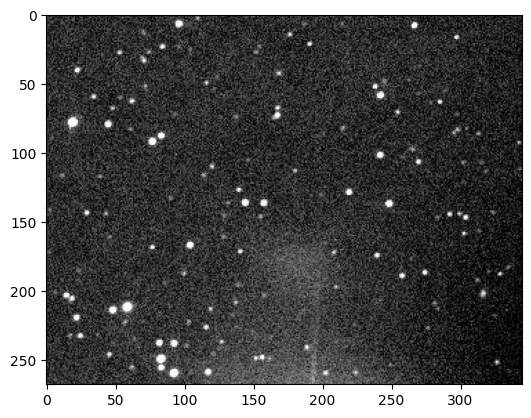

In [4]:
img = np.array(pixels)
img = img.mean(axis=-1).astype(np.uint8)
plt.imshow(img, cmap="gray")

In [5]:
img.shape

(268, 345)

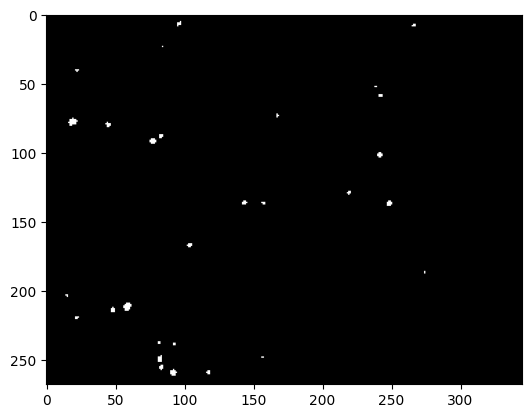

In [6]:
thershhold = 245
binarized = (img > thershhold)*1
dn_binary = cv2.medianBlur(binarized.astype(np.uint8), 3)
plt.imshow(dn_binary, cmap="gray")

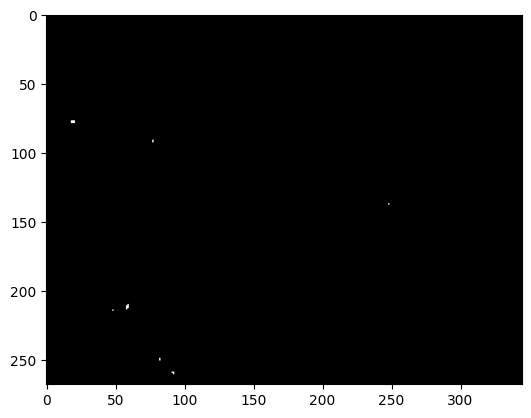

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
binarized = np.uint8(dn_binary)
eroded_image = cv2.erode(binarized, kernel)
plt.imshow(eroded_image, cmap="gray")

Thus this wasnt a good way to find the number of stares in the first binarized image so in this case I used inbuilt cv2 function to count and detect the numbers 

In [8]:
eroded_image.sum()

21

This below function finds the number of connected objects in a binary images 

In [9]:
num_lbls, labelss, stats, centroids = cv2.connectedComponentsWithStats(dn_binary, 4, cv2.CV_32S)

As its being shown we found 13 stars in this image But further we will see that the 13th stare is actually a noise thus we can not be completly sure that the prediction is true 

In [10]:
num_lbls

30

In [11]:
labelss

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

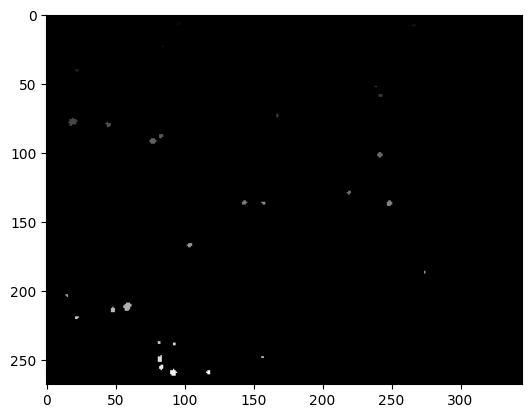

In [12]:
plt.imshow(labelss, cmap="gray")

In [13]:
centroids

array([[172.17459199, 133.45373312],
       [ 96.        ,   6.5       ],
       [266.2       ,   7.6       ],
       [ 84.        ,  23.        ],
       [ 22.        ,  40.25      ],
       [238.5       ,  52.        ],
       [242.        ,  58.5       ],
       [167.25      ,  73.        ],
       [ 18.88      ,  77.6       ],
       [ 44.6       ,  79.6       ],
       [ 82.875     ,  87.875     ],
       [ 77.        ,  91.5       ],
       [241.5       , 101.5       ],
       [219.16666667, 128.83333333],
       [143.33333333, 136.11111111],
       [248.38461538, 136.61538462],
       [157.2       , 136.4       ],
       [103.66666667, 166.88888889],
       [274.        , 186.5       ],
       [ 14.66666667, 203.33333333],
       [ 58.5       , 211.42307692],
       [ 48.        , 213.8       ],
       [ 21.8       , 219.4       ],
       [ 81.5       , 237.5       ],
       [ 92.5       , 238.5       ],
       [ 82.07692308, 249.30769231],
       [156.5       , 248.        ],
 

In [14]:
mask = np.zeros(dn_binary.shape)

for coordinate in centroids:
    x, y = int(np.round(coordinate[0])), int(np.round(coordinate[[1]]))
    mask[y, x] = 1

C:\Users\hosse\AppData\Local\Temp\ipykernel_5100\1345418619.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x, y = int(np.round(coordinate[0])), int(np.round(coordinate[[1]]))


And as we can see these are the points of the 

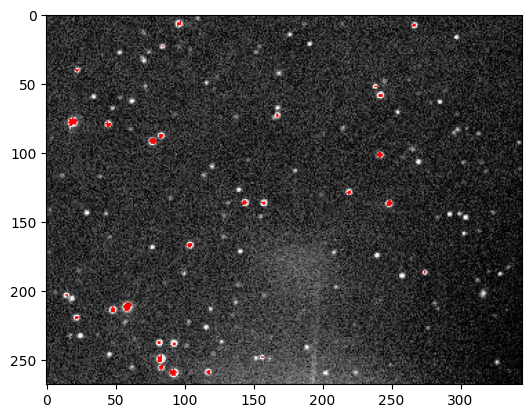

In [15]:
newIMG = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
newIMG[dn_binary.astype(bool)] = np.array([255, 0, 0])
plt.imshow(newIMG)

As this ploted coordinates show there axist the extra point in below map which is not correct 

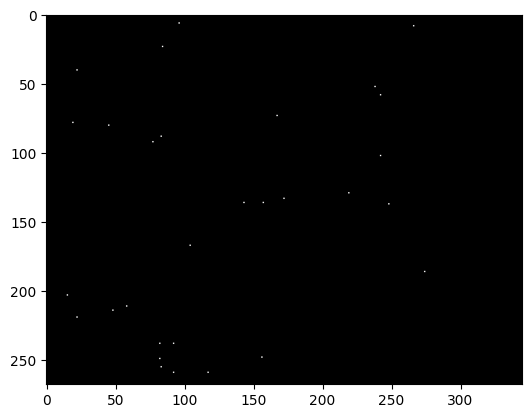

In [16]:
plt.imshow(mask, cmap="gray")